<a href="https://colab.research.google.com/github/ftsantos/vendas/blob/main/modelo_previsao_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Previsão de Vendas

**O problema**: É melhor a empresa investir em propagandas em jornais, no rádio ou na TV?

**Projeto Ciência de Dados - Previsão de Vendas**


**Passos**

* Entendimento do Desafio
    * As vendas são em milhões
    * Os valores de TV, Jornal e Rádio são em milhar
* Entendimento da área/empresa
* Extração/Obtenção de dados
* Ajustes de dados (Tratamento/Limpeza)
* Análise exploratória
* Modelagem + Algoritmos (Aqui que entra a IA, se necessário)
* Interpretação de resultados

In [1]:
# Para conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando as bibliotecas necessárias (As que foram instaladas)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path_principal = '/content/'

In [6]:
# Carreganda a tabela de dados
path_base = path_principal + 'advertising.csv'
tabela = pd.read_csv(path_base)
display(tabela) # print(tabela) 

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Análise exploratória**

**Correlação**:número de 0 a 1. QUanto maior a correlação, mais próximo de 1.

Exemplo 1

* TV: 1, 2, 3
* Vendas: 10, 20, 30
* TV dobrou, vendas também dobrou, correlação = 1

Exemplo 2

* TV: 2, 4, 6
* Vendas: 10, 20, 30
* TV dobrou, vendas também dobrou, correlação = 1

Exemplo 3

* TV: 2, 5, 6
* Vendas: 10, 20, 30
* Correlação próxima de 1, tv aumenta, vendas também aumenta

Exemplo 4

* TV: 2, 1, 3
* Vendas: 10, 20, 30
* TV diminui, vendas aumenta, tv aumenta, vendas aumenta
* Correlação bem próxima de zero

Exemplo 5

* TV: 1, 3, 2
* Vendas: 10, 20, 30
* TV aumenta, vendas aumenta, TV diminui, vendas aumenta
* Correlação bem próxima de zero

**Notas**:

* Pode ter correlção negativa, um cresce e o outro diminui proporcionalmente.
* Ver a correlação entre vendas e os anúncios em tv, rádio e jornal

In [7]:
# Ver a correlação entre vendas e os anúncios em tv, rádio e jornal

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

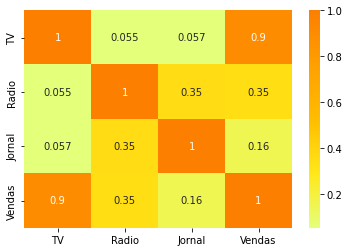

In [8]:
#seaborn.pydata.org
# cria o gráfico da correlação
# cmap são as cores do heatmap e annot as anotações
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
#exibe o gráfico
plt.show()

In [9]:
# y - o que será previsto
# x - o que será usado para prever y
# neste exemplo, y = vendas, x = tv, radio e jornal

y = tabela["Vendas"]
x = tabela[["TV","Radio","Jornal"]] # 2 colchetes, pois está selecionando mais de uma coluna
# Exclui a coluna Vendas, axis=1 indica coluna, axis=0, indica linha
#z = tabela.drop('Vendas', axis=1) # quando tem muitas colunas. Equivale a: x = tabela[["TV","Radio","Jornal"]] 
#display(z)

# Separa em dados de Treino e dados de Teste
from sklearn.model_selection import train_test_split # scikit-learn

# O retorno de train_test_split(x, y) é exatamente nesta ordem. Faz essa divisão aleatoriamente
# test_size indica a percentagem para teste. Por padrão é 20%
# ramdom_state=1 ... embaralhar sempre igual, isso só para didática
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)
# display(x_treino)
# display(y_treino)
# display(x_teste)
# display(y_teste)

**Temos um problema de regressão**

Vamos testar dois modelos para decidirmos qual usar:

* Regressão Linear
* RandomForest(Árvore de Decisão)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar os dois modelos
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()

# Treina os dois modelos com os dados de treino
modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)



RandomForestRegressor()

**Teste da AI e Avaliação do Melhor Modelo**

* Comparar a previsão do modelo 1 com y de teste
* Comparar a previsão do modelo 2 com y de teste
* Calcular se estão próximos do y de teste

Isso é calcular o R², que diz o % que o nosso modelo consegue explicar o que acontece

In [11]:
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressao_linear))
print(metrics.r2_score(y_teste, previsao_arvore_decisao))

0.882123415112814
0.9643073571844005


**Visualização Gráfica das Previsões**

A previsão com Árvore de Decisão está mais próximo da linha y_teste

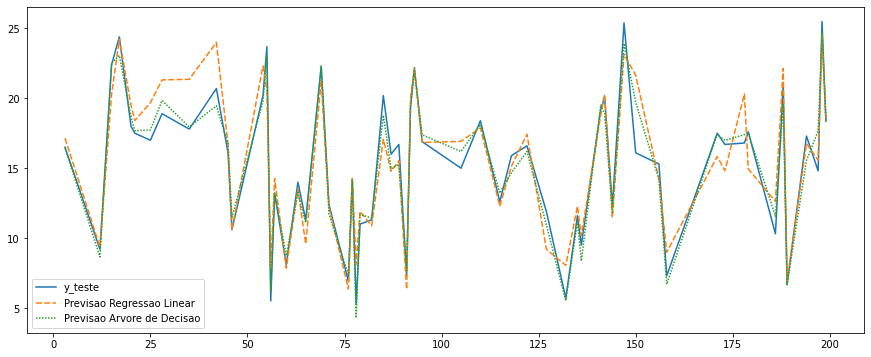

In [12]:
# A árvore de decisão foi o melhor modelo, vamos utilizar este para fazer nossas previsões

tabela_auxiliar = pd.DataFrame() # cria uma nova tabela e adiciona as 3 colunas desejadas
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao Regressao Linear"] = previsao_regressao_linear
tabela_auxiliar["Previsao Arvore de Decisao"] = previsao_arvore_decisao

plt.figure(figsize=(15,6)) # o tamanho da imagem do gráfico
sns.lineplot(data=tabela_auxiliar)
plt.show() # exibe

**Fazendo uma nova previsão**

In [14]:
# importa a tabela com as novas informações que serão preditas

path_novos_dados = path_principal + 'novos.csv' # a base com novos casos
nova_tabela = pd.read_csv(path_novos_dados)
display(nova_tabela)

print('\nPrevisão de vendas:')
# Usar o modelo arvore de decisão já treinado para realizar a predição
previsao = modelo_arvore_decisao.predict(nova_tabela)
print(previsao) # cada célula da previsão e relacionada a uma linha da tabela nova_tabela

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0



Previsão de vendas:
[ 7.038  8.584 20.286]


**Conclusões**

* Se investir 23.1 mil em TV, 3.8 em rádio e 69.2 mil em jornal, provavelmente serão 7.038.000,00
* Se investir 44.5 mil em TV, 0.0 em rádio e 5.1 mil em jornal, provavelmente serão 8.584.000,00
* Se investir 170.2 mil em TV, 45.9 em rádio e 0.0 mil em jornal, provavelmente serão 20.286.000,00